In [29]:
import sys
path_to_folder = "XXX" # IMPORTANT change this to your path folder
sys.path.append(path_to_folder)
import numpy as np
import matplotlib.pyplot as plt
from src.ode_computations import computes_discount_function, computes_approximation_guarantee

# Replicating Figure 2

In [26]:
# We regenerate the discount functions
y,int_y = computes_discount_function([i*0.1 for i in range(2,11)],200,0.002)

0.2 0.506
0.30000000000000004 0.518
0.4 0.54
0.5 0.5660000000000001
0.6000000000000001 0.5900000000000001
0.7000000000000001 0.6140000000000001
0.8 0.6360000000000001
0.9 0.6580000000000001
1.0 0.6780000000000002


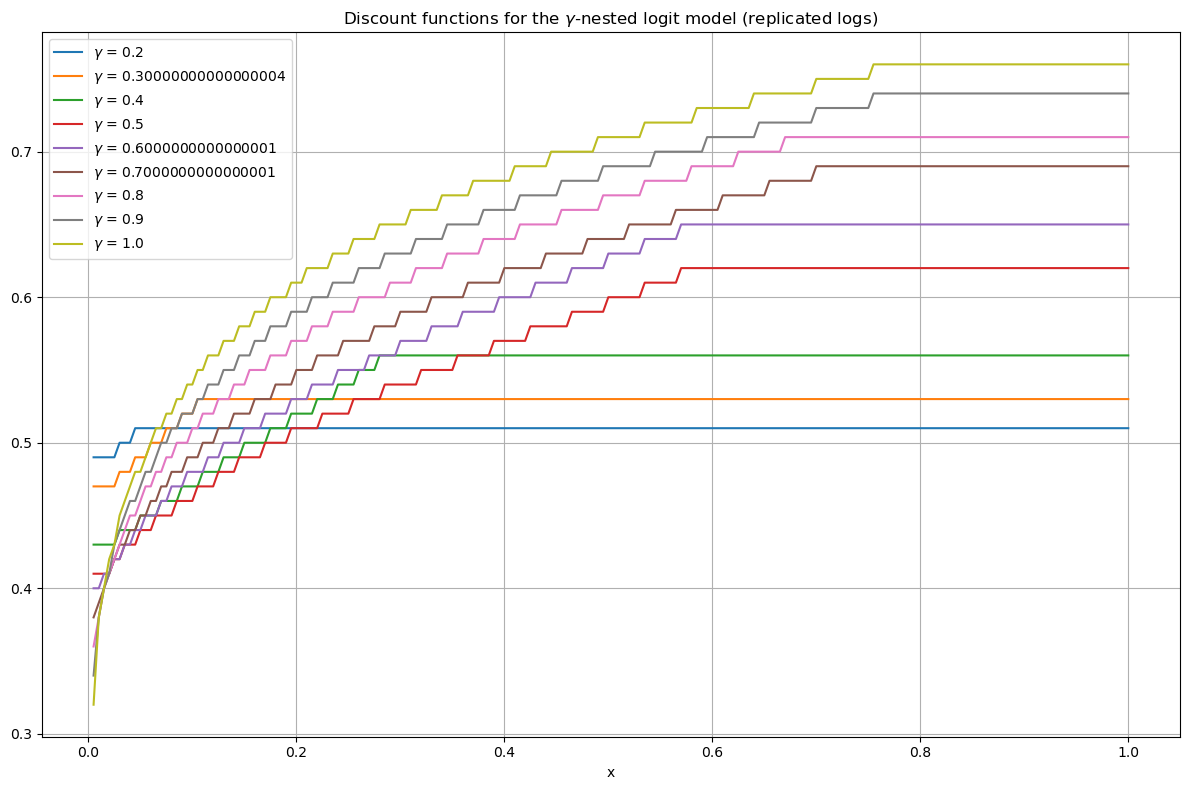

In [70]:
# We plot the new discount functions
x = 5e-3 * np.arange(1, 201)
plt.figure(figsize=(12, 8))

for i in range(9):
    plt.plot(x, y[i], label=f"$\\gamma$ = {1e-1 * (i+2)}")

plt.title("Discount functions for the $\\gamma$-nested logit model (replicated logs)")
plt.xlabel("x")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the figure if needed
plt.savefig("../outputs/figure_2_replicated.png")

plt.show()

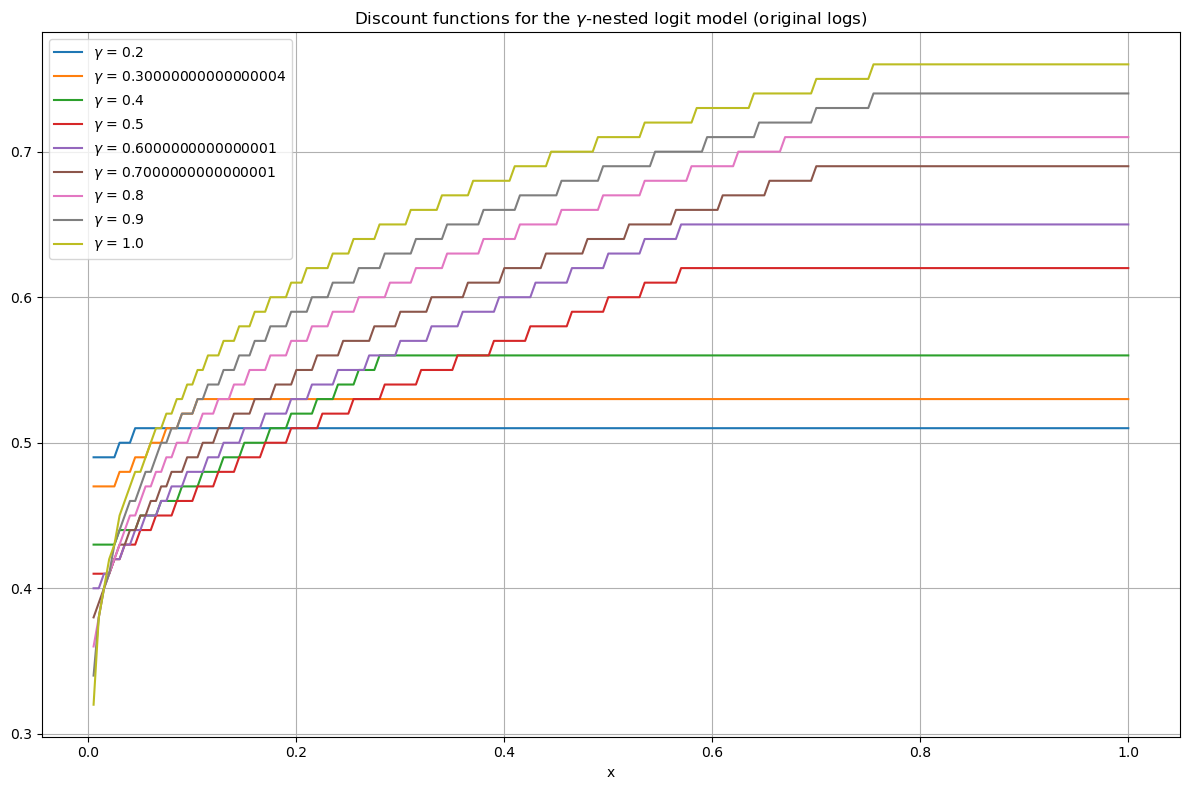

In [71]:
# We can also plot the original discount functions
discounts = np.load('../outputs/discount_functions_updated.npy')
x = 5e-3 * np.arange(1, 201)
plt.figure(figsize=(12, 8))

for i in range(9):
    plt.plot(x, discounts[8-i], label=f"$\\gamma$ = {1e-1 * (i+2)}")

plt.title("Discount functions for the $\\gamma$-nested logit model (original logs)")
plt.xlabel("x")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the figure if needed
plt.savefig("../outputs/figure_2_original.png")

plt.show()

# Replicating Figure 3

In [65]:
# We determine the approximation guarantee of the discount functions
perf_optimized =  [computes_approximation_guarantee([1-0.1*q],discounts[q,:],1e-3,2e-3,200)[0] for q in range(discounts.shape[0])]
perf_MNL = computes_approximation_guarantee([1-0.1*q for q in range(discounts.shape[0])],discounts[0,:],1e-3,2e-3,200) 
perf_exp = computes_approximation_guarantee([1-0.1*q for q in range(discounts.shape[0])],np.exp(np.arange(200.)/200.-1),1e-3,2e-3,200) 

1.0 0.6720000000000002
0.9 0.6540000000000001
0.8 0.6320000000000001
0.7 0.6120000000000001
0.6 0.5880000000000001
0.5 0.5640000000000001
0.3999999999999999 0.538


/Users/aaouad/Documents/twosided-assortment/src/ode_computations.py:169: RuntimeWarning: divide by zero encountered in scalar divide
  val = min(1,1-(C - int_y[t-1]/alpha)/x/(1-x)*alpha\


0.29999999999999993 0.516
0.19999999999999996 0.504
1.0 0.6720000000000002
0.9 0.6400000000000001
0.8 0.6100000000000001
0.7 0.5820000000000001
0.6 0.556
0.5 0.532
0.3999999999999999 0.502
0.29999999999999993 0.5
0.19999999999999996 0.5
1.0 0.5720000000000001
0.9 0.5660000000000001
0.8 0.558
0.7 0.55
0.6 0.54
0.5 0.528
0.3999999999999999 0.512
0.29999999999999993 0.5
0.19999999999999996 0.5


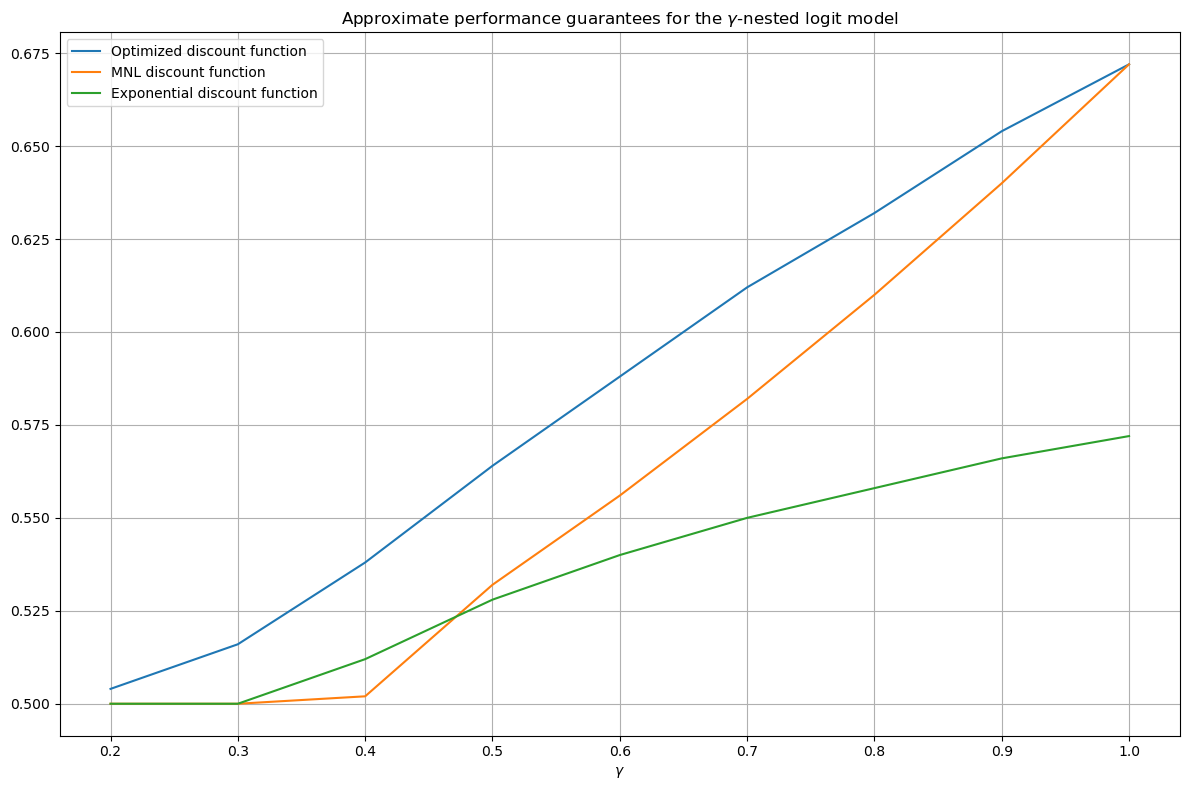

In [74]:
# We plot the resulting approximation guarantees
x = 1e-1 * np.arange(2,11)
plt.figure(figsize=(12, 8))

plt.plot(x, [x[1] for x in perf_optimized][::-1], label=f"Optimized discount function")
plt.plot(x, [x[1] for x in perf_MNL][::-1], label=f"MNL discount function")
plt.plot(x, [x[1] for x in perf_exp][::-1], label=f"Exponential discount function")

plt.title("Approximate performance guarantees for the $\\gamma$-nested logit model")
plt.xlabel("$\\gamma$")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the figure if needed
plt.savefig("../outputs/figure_3.png")

plt.show()